# Doğrusal Olmayan Regresyon Modelleri

* K-En Yakın Komşu (KNN)
* Destek Vektör Resgresyonu (SVR)
* Çok Katmanlı Algılayıcılar (ANN)
* Classification and Regression Trees (CART)
* Bagging (Bootstrap Aggregation)
* Random Forests (RF)
* Gradient Boosting Machines (GBM)
* Extreme Gradient Boosting (XGBoost)
* LightGBM
* CatBoost

In [9]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from skompiler import skompile
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from warnings import filterwarnings
filterwarnings('ignore')

# K-En Yakın Komşu (KNN)
Tahminler gözlem benzerliğine göre yapılır
<br>
Öklid ya da benzeri bir uzaklık hesabı ile her bir gözleme uzaklık hesaplanır
<br><br>
${\displaystyle \sqrt {\sum_{i=1}^k (x_i - y_i)^2}}$
<br><br>
**KNN Basamakları**
* Komşu sayısını belirle (K)
* Bilinmeyen nokta ile diğer tüm noktalar ile arasındaki uzaklıkları hesapla
* Uzaklıkları sırala ve belirlenen k sayısına göre en yakın olan k gözlemi seç
* Sınıflandırma ise en sık sınıf, regresyon ise ortalama değeri tahmin değeri olarak ver

In [2]:
hit = pd.read_csv("Ml3Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [3]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)
# Komşuluk sayısını belirleme
knn_model.n_neighbors

5

## Tahmin

In [4]:
y_pred = knn_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

In [5]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)

k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  179.52761335480352
k = 3 için RMSE değeri:  205.20157172291863
k = 4 için RMSE değeri:  220.5139794876305
k = 5 için RMSE değeri:  239.6467132541376
k = 6 için RMSE değeri:  243.5904190007242
k = 7 için RMSE değeri:  258.1478781634636
k = 8 için RMSE değeri:  266.05374203349805
k = 9 için RMSE değeri:  269.73782093553376
k = 10 için RMSE değeri:  271.2798300436963


## Model Tuning

In [6]:
# Komşu sayılarını belirleme
knn_params = {"n_neighbors": np.arange(1,30,1)}
knn = KNeighborsRegressor()
# Knn nesnesi tanımlama
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [7]:
# En uygun parametreyi belirleme
knn_cv_model.best_params_["n_neighbors"]

8

In [8]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )


k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  325.3947514706382
k = 2 için RMSE değeri:  179.52761335480352 RMSE_CV değeri:  293.24000183333817
k = 3 için RMSE değeri:  205.20157172291863 RMSE_CV değeri:  283.7486667487823
k = 4 için RMSE değeri:  220.5139794876305 RMSE_CV değeri:  286.3240222024089
k = 5 için RMSE değeri:  239.6467132541376 RMSE_CV değeri:  290.0705466132226
k = 6 için RMSE değeri:  243.5904190007242 RMSE_CV değeri:  298.1263115575851
k = 7 için RMSE değeri:  258.1478781634636 RMSE_CV değeri:  294.77070479194987
k = 8 için RMSE değeri:  266.05374203349805 RMSE_CV değeri:  291.98672028891235
k = 9 için RMSE değeri:  269.73782093553376 RMSE_CV değeri:  295.7162739573105
k = 10 için RMSE değeri:  271.2798300436963 RMSE_CV değeri:  301.31047022701154


In [9]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [10]:
np.sqrt(mean_squared_error(y_test,knn_tuned.predict(X_test))) 

413.7094731463598

# SVR (Destek Vektör Regresyonu)

Amaç, bir marjin aralığında maksimum noktayı en küçük hata ile alabilecek şekilde doğru ya da eğriyi belirlemektir
<br><br>
**Minimizasyon Problemi**
<br><br>
${\displaystyle {\frac {1}{2}}||w||^2 + c {\sum_{i=1}^2}(\xi_i+\xi_i^*)}$
<br><br>
**Kısıtlar**
<br><br>
${\displaystyle y_i - (w * x_i) - b \eqslantless \epsilon + \xi_i}$
<br><br>
${\displaystyle (w * x_i) + b - y_i \eqslantless \epsilon + \xi_i^*}$
<br><br>
${\displaystyle \xi_i , \xi_i^* \geqslant 0,}$<br>${\displaystyle i = 1,...,m}$

# Doğrusal SVR

In [42]:
hit = pd.read_csv("Ml3Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [43]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [69]:
svr_model = SVR(kernel = "linear").fit(X_train, y_train)
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [70]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [71]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [72]:
-48.69756097561513 + 4.969512195122093*91

403.5280487804953

In [85]:
y_pred = svr_model.predict(X_train)

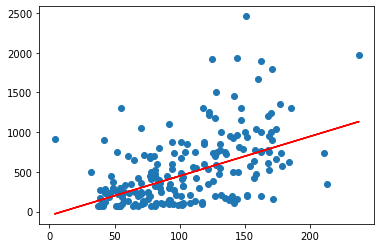

In [86]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r");

In [87]:
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334345 + 5.172456135470686 x


In [88]:
-8.814095480334572 + 5.1724561354706875*91

461.879412847498

Text(0, 0.5, 'Maaş (Salary)')

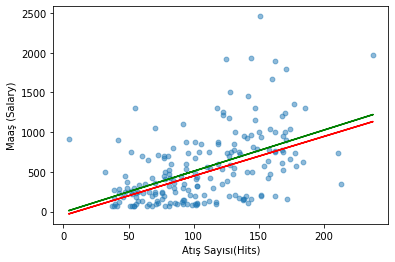

In [89]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

## Tahmin

In [90]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [91]:
svr_model.predict([[91]])

array([403.52804878])

In [92]:
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

In [93]:
svr_model

SVR(kernel='linear')

## Model Tuning

In [94]:
svr_model

SVR(kernel='linear')

In [95]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [96]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [100]:
svr_tuned = SVR(kernel = "linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [103]:
y_pred = svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

# Doğrusal Olmayan SVR

In [104]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

eps = 0.1
svr = SVR(kernel = "rbf", epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

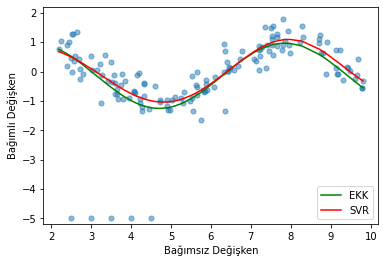

In [105]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

In [108]:
hit = pd.read_csv("Ml3Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [109]:
svr_rbf = SVR(kernel = "rbf").fit(X_train, y_train)

## Tahmin

In [110]:
y_pred = svr_rbf.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

460.0032657244849

## Model Tuning

In [112]:
svr_params = {"C": [0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [116]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [118]:
svr_tuned = SVR(kernel = "rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)
y_pred = svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

428.00406888095694

# Yapay Sinir Ağları (Çok Katmanlı Algılayıcı)

İnsan beyninin bilgi işleme şeklini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen kuvvetli makine öğrenmesi algoritmalarından birisidir
<br><br><br>
${\displaystyle h_k (x)=g(\beta_{0k} + {\sum_{j=1}^P}x_j \beta_{jk})}$
<br><br>
${\displaystyle g(u)= {\frac{1}{1+ e^{-u}}}}$
<br><br>
${\displaystyle f(x) = \gamma_0 + {\sum_{k=1}^H}\gamma_k h_k}$
<br><br>
${\displaystyle {\sum_{i=1}^n}(y_i - f_i (x))^2 + \lambda {\sum_{k=1}^H}{\sum_{j = 0}^P}\beta_{jk}^2 + \lambda{\sum_{k=0}^H}\gamma_k^2}$

In [131]:
hit = pd.read_csv("Ml3Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [132]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [137]:
mlp_model = MLPRegressor().fit(X_train_scaled, y_train)
print(mlp_model.n_layers_)
print(mlp_model.hidden_layer_sizes)

3
(100,)


In [140]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)
print(mlp_model.hidden_layer_sizes)
print(mlp_model.n_layers_)

(100, 20)
4


## Tahmin

In [141]:
mlp_model.predict(X_train_scaled)[0:5]

array([ 79.59443009, 390.66435746, 256.57332638,  67.57010631,
        73.41336041])

In [142]:
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

451.86547151287

## Model Tuning

In [145]:
mlp_params = {"alpha": [0.1,0.01,0.02,0.005],
              "hidden_layer_sizes": [(20,20),(100,50,150),(300,200,150)],
              "activation": ["relu","logistic"]}
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10).fit(X_train_scaled, y_train)
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.005, 'hidden_layer_sizes': (100, 50, 150)}

In [147]:
mlp_tuned = MLPRegressor(alpha = 0.02,hidden_layer_sizes = (100,50,150)).fit(X_train_scaled, y_train)
y_pred = mlp_tuned.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

361.2123051320188

# Regresyon Ağaçları (CART)

Amaç, veri seti içerisindeki karmaşık yapıları basit karar yapılarına dönüştürmektir
<br>
Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır

In [67]:
hit = pd.read_csv("Ml3Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [68]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [69]:
cart_model = DecisionTreeRegressor()

In [70]:
?cart_model

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor()
File:        c:\users\tolga\appdata\local\programs\python\python310\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss using the median of each terminal node, and "poisson" which
    uses reduction in Poisson deviance to find splits.

    .. versionadded:: 0.18
    

In [71]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [72]:
# # Ağaç yapısını gösterme

# !pip install skompiler
# !pip install SKompiler[full]
# from skompiler import skompile

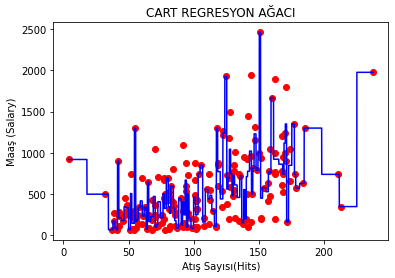

In [73]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESYON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

In [74]:
# Karar kural seti
print(skompile(cart_model.predict).to("python/code"))

((920.0 if x[0] <= 18.0 else ((500.0 if x[0] <= 34.5 else (70.0 if x[0] <= 
    38.0 else 175.0) if x[0] <= 39.5 else 90.0 if x[0] <= 40.5 else 67.5) if
    x[0] <= 41.5 else 900.0 if x[0] <= 42.5 else (((((215.55566666666664 if
    x[0] <= 44.5 else 180.0) if x[0] <= 46.5 else 347.5 if x[0] <= 48.0 else
    337.5) if x[0] <= 50.0 else 70.0) if x[0] <= 51.5 else 507.5) if x[0] <=
    52.5 else 150.0 if x[0] <= 53.5 else 146.83333333333334) if x[0] <= 
    54.5 else 1300.0 if x[0] <= 55.5 else (170.0 if x[0] <= 56.5 else 
    193.75) if x[0] <= 57.5 else ((((((340.0 if x[0] <= 59.0 else 418.5) if
    x[0] <= 60.5 else 235.0 if x[0] <= 62.0 else 341.667) if x[0] <= 63.5 else
    75.0) if x[0] <= 64.5 else 650.0) if x[0] <= 65.5 else 170.0 if x[0] <=
    67.0 else 228.66666666666666) if x[0] <= 69.0 else 472.5) if x[0] <= 
    70.5 else (100.0 if x[0] <= 71.5 else 130.0) if x[0] <= 72.5 else 
    409.1665 if x[0] <= 74.5 else 215.0) if x[0] <= 76.5 else (((505.0 if x
    [0] <= 77.5 else 

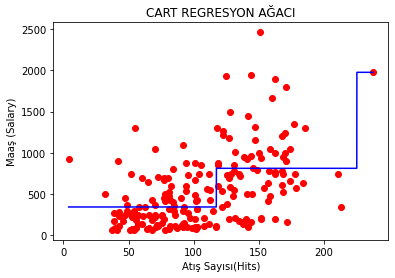

In [75]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 3)
cart_model.fit(X_train, y_train)
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESYON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

In [76]:
# Karar kural seti
print(skompile(cart_model.predict).to("python/code"))

(345.2011551724138 if x[0] <= 117.5 else 813.0988 if x[0] <= 225.5 else 1975.0)



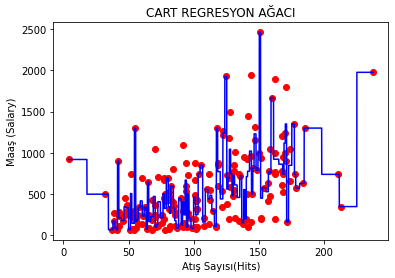

In [77]:
cart_model = DecisionTreeRegressor(min_samples_split = 2)
cart_model.fit(X_train, y_train)
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESYON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

In [78]:
# Karar kural seti
print(skompile(cart_model.predict).to("python/code"))

((920.0 if x[0] <= 18.0 else ((500.0 if x[0] <= 34.5 else (70.0 if x[0] <= 
    38.0 else 175.0) if x[0] <= 39.5 else 90.0 if x[0] <= 40.5 else 67.5) if
    x[0] <= 41.5 else 900.0 if x[0] <= 42.5 else (((((215.55566666666664 if
    x[0] <= 44.5 else 180.0) if x[0] <= 46.5 else 347.5 if x[0] <= 48.0 else
    337.5) if x[0] <= 50.0 else 70.0) if x[0] <= 51.5 else 507.5) if x[0] <=
    52.5 else 150.0 if x[0] <= 53.5 else 146.83333333333334) if x[0] <= 
    54.5 else 1300.0 if x[0] <= 55.5 else (170.0 if x[0] <= 56.5 else 
    193.75) if x[0] <= 57.5 else ((((((340.0 if x[0] <= 59.0 else 418.5) if
    x[0] <= 60.5 else 235.0 if x[0] <= 62.0 else 341.667) if x[0] <= 63.5 else
    75.0) if x[0] <= 64.5 else 650.0) if x[0] <= 65.5 else 170.0 if x[0] <=
    67.0 else 228.66666666666666) if x[0] <= 69.0 else 472.5) if x[0] <= 
    70.5 else (100.0 if x[0] <= 71.5 else 130.0) if x[0] <= 72.5 else 
    409.1665 if x[0] <= 74.5 else 215.0) if x[0] <= 76.5 else (((505.0 if x
    [0] <= 77.5 else 

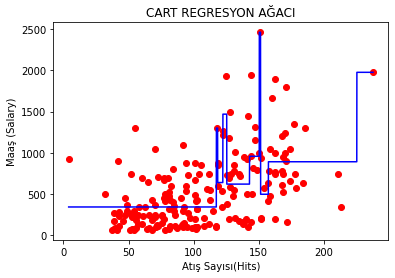

In [79]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 10)
cart_model.fit(X_train, y_train)
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESYON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

In [80]:
# Karar kural seti
print(skompile(cart_model.predict).to("python/code"))

(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)



## Tahmin

In [81]:
x = [91]

In [82]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [83]:
cart_model.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [84]:
cart_model.predict([[91]])

array([345.20115517])

**Sonuçlar aynıdır**

In [85]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

486.34593105235456

## Model Tuning

In [86]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 2)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

462.4884294447576

In [87]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 15)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

455.8367349677217

In [88]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 15, min_samples_split = 10)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

458.44092458608196

In [89]:
cart_model = DecisionTreeRegressor(min_samples_split = 2)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [90]:
cart_model = DecisionTreeRegressor(min_samples_split = 2)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

231.67017321152872

In [91]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [92]:
cart_params = {"min_samples_split":range(2,20), 
          "max_leaf_nodes":range(2,10)}
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10).fit(X_train, y_train)
cart_cv_model.best_params_

{'max_leaf_nodes': 2, 'min_samples_split': 2}

In [93]:
cart_params = {"min_samples_split":range(2,100), 
          "max_leaf_nodes":range(2,10)}
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10).fit(X_train, y_train)
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [94]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 76).fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

423.406689243066

# Bagged Trees Regresyon (Bagging)

Temeli bootstrap yöntemi ile oluşturulan birden fazla karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirmesine dayanır

In [96]:
hit = pd.read_csv("Ml3Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [97]:
bag_model = BaggingRegressor(bootstrap_features = True).fit(X_train, y_train)
bag_model.n_estimators

10

In [98]:
bag_model.estimators_

[DecisionTreeRegressor(random_state=916374743),
 DecisionTreeRegressor(random_state=142342350),
 DecisionTreeRegressor(random_state=2011662457),
 DecisionTreeRegressor(random_state=555008477),
 DecisionTreeRegressor(random_state=835665431),
 DecisionTreeRegressor(random_state=1420178061),
 DecisionTreeRegressor(random_state=1525964507),
 DecisionTreeRegressor(random_state=604126080),
 DecisionTreeRegressor(random_state=1342325629),
 DecisionTreeRegressor(random_state=2098747816)]

In [99]:
bag_model.estimators_samples_

[array([135,  75, 130, 126, 195,  50,  89, 113,  57,  63, 171, 113, 192,
        174, 123, 136, 157, 167,  84,  24, 149,  76,  48, 117, 107,  32,
        193, 161, 116, 155,  72,  95, 153, 166,  98,  15,  93,  49,   1,
        103, 189, 183,  47,  11, 138,  94, 113,  52, 196, 122, 194,  83,
         19, 148, 195,  82,  51,  43, 130, 189, 140,  42, 108,  68, 184,
         51, 121, 122, 147, 142,  73, 109,  77, 162, 184, 174,  13, 107,
         83, 102,  53,  73, 154,  11, 151,   0, 100, 111,  64,  11, 147,
        114,  81, 182, 102, 151,  62, 115, 115,  13, 196, 100, 123, 164,
         90, 112, 182, 152, 170,  77, 171,  87, 115, 145, 133, 132, 135,
        146,  18, 124, 192, 187, 131, 175, 111, 119, 129,  36,  29, 134,
         51,  45,  20,  54, 136,   6, 127, 143,  11, 154, 158,  61, 139,
         74,  41, 121,  84,  80, 177, 174, 110,  81,  55, 109,  47, 159,
        131, 143, 167,  41, 180, 115, 188, 175,   3,  15,  72,  45,  74,
         68, 150, 121, 134, 169,  44, 106,   9, 172

In [100]:
bag_model.estimators_features_

[array([ 7,  9,  4,  8,  3, 10,  2, 10, 17, 15,  1, 16,  1, 17,  0, 12,  6,
        16, 14]),
 array([14, 13,  5, 15, 13, 10,  4, 18, 11,  1, 15,  4, 14, 14, 12,  9, 17,
        18,  9]),
 array([ 4, 17, 14,  1,  9,  9,  7, 10, 15, 11,  1,  0, 12, 16,  9,  1, 11,
        11,  4]),
 array([ 1, 14,  1,  0,  4,  1,  0, 13,  0,  9, 15,  4, 12,  6, 14, 16, 12,
        17, 10]),
 array([ 7,  5,  1,  5, 14,  7,  8,  4, 18,  9, 16,  0,  9,  2,  2,  7, 14,
        12, 16]),
 array([13, 10,  8,  4, 15,  5,  4, 18, 17, 17,  2,  5, 10,  7,  8, 13,  9,
        13, 10]),
 array([18,  1, 14,  0, 13,  6,  2, 15,  2,  5, 18,  3, 15,  4,  0, 16,  6,
        16, 15]),
 array([ 0, 18, 15,  1,  5,  5,  2,  4,  4,  3,  6,  9, 16, 11, 17, 14,  3,
         8,  7]),
 array([ 9,  5, 12,  7,  5,  1, 15, 16, 12,  6, 10, 11,  8, 12,  3,  4, 13,
         8,  6]),
 array([ 8, 13,  4,  9,  7, 11,  1, 15,  7, 14,  0,  9,  7,  1, 18,  1,  3,
         9,  5])]

In [101]:
bag_model.estimators_[0]

DecisionTreeRegressor(random_state=916374743)

## Tahmin

In [102]:
y_pred = bag_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.2394430567229

In [103]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)
np.sqrt(mean_squared_error(y_test, iki_y_pred))

449.4766692679859

In [104]:
yedi_y_pred = bag_model.estimators_[6].fit(X_train, y_train).predict(X_test)
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

540.0120517928842

## Model Tuning

In [105]:
bag_model = BaggingRegressor(bootstrap_features = True).fit(X_train, y_train)
bag_params = {"n_estimators": range(2,20)}
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10).fit(X_train, y_train)
bag_cv_model.best_params_

{'n_estimators': 17}

In [106]:
bag_tuned = BaggingRegressor(n_estimators = 14, random_state = 45).fit(X_train, y_train)
y_pred = bag_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

346.457987188104

# Random Forests

Temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır
<br><br>
* Bagging (Breiman, 1996) ile Random Subspace (Ho, 1998) yöntemlerinin birleşimi ile oluşmuştur
* Ağaçlar için gözlemler bootstrap rastgele örnek seçim yöntmei ile **değişkenler random subspace yöntemi ile seçilir**
* Karar ağacının her br düğümünde en iyi dallara ayırıcı (bilgi kazancı) değişken tüm değişkenler arasından rastgele seçilen daha az sayıdaki değişken arasından seçilir
* Ağaç oluşturmada veri setinin 2/3'ü kullanılır, dışarıda kalan veri ağaçlarının performans değerlendirmesi ce değişken öneminin belirlenmesi için kullanılır
* Her düğüm noktasında rastgele değişken seçimi yapılır (regresyonda p/3, sınıflamada karekök(p))
* Nihai tahmin için ağaçlardan tahmin değerleri talep edilirken her bir ağacın daha önce hesaplanan hata oranları göz önüne alınarak ağaçlara ağırlık verilir

In [108]:
hit = pd.read_csv("Ml3Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [110]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)

In [111]:
?rf_model

Type:        RandomForestRegressor
String form: RandomForestRegressor(random_state=42)
Length:      100
File:        c:\users\tolga\appdata\local\programs\python\python310\lib\site-packages\sklearn\ensemble\_forest.py
Docstring:  
A random forest regressor.

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and uses averaging
to improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"squared_error", "absolute_error", "poisson"},             default="squared_error"
    The function to measure the q

## Tahmin

In [112]:
rf_model.predict(X_test)[0:5]

array([ 738.69167,  913.51164, 1181.145  ,  139.65167,  634.60833])

In [113]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

## Model Tuning

In [115]:
rf_params = {"max_depth": list(range(1, 10)),
             "max_features": [3, 5, 10, 15],
             "n_estimators" : [100, 200, 500, 1000, 2000]}
rf_model = RandomForestRegressor(random_state = 42)
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1).fit(X_train, y_train)
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 200}

In [116]:
rf_tuned = RandomForestRegressor(max_depth = 8, max_features = 3, n_estimators = 200).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

348.2157319389608

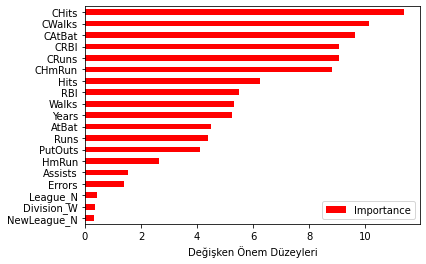

In [118]:
Importance = pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},index = X_train.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).plot(kind = "barh", color = "r")
plt.xlabel("Değişken Önem Düzeyleri");

# Gradient Boosting Machines

AdaBoost'un sınılandırma ve regresyon problemlerine kolayca uyarlanabilen genelleştirilmiş versiyonudur
<br>
Artıklar üzerinde tek bir tahminsel model formunda olan modeller serisi kurulur
<br><br>
* Boosting Yöntemlerine Giriş
    * Zayıf öğrencileri bir araya getirip güçlü bir öğrenici ortaya çıkarmak fikrine dayanır
* Adaptive Boosting (AdaBoost)
    * Zayıf sınıflandırıcıların bir araya gelerek güçlü bir sınıflandırıcı oluşturması fikrini hayata geçiren algoritmadır
<br><br>
* Gradient boosting tek bir tahminsel model formunda olan modeller serisi oluşturur
* Seri içerisindeki bir model, serideki bir önceki modelin tahmin artıklarının/hatalarının (residuals) üzerinde kurularak (fit) oluşturulur
* GBM diferansiyellenebilen herhangi bir kayıp fonksiyonu optimize eebilen Gradient descent algoritmasını kullanmaktadır
* GBM birçok temel öğrenici tipi (base learner type) kullanabilir. (Trees, linear terms, spilines vb.)
* Cost fonksiyonları ve link fonksiyonları modifiye edilebilirdir
* Boosting + Gradient Descent = GBM

In [120]:
hit = pd.read_csv("Ml3Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [122]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [123]:
?gbm_model

Type:        GradientBoostingRegressor
String form: GradientBoostingRegressor()
Length:      100
File:        c:\users\tolga\appdata\local\programs\python\python310\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for regression.

GB builds an additive model in a forward stage-wise fashion;
it allows for the optimization of arbitrary differentiable loss functions.
In each stage a regression tree is fit on the negative gradient of the
given loss function.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'squared_error', 'absolute_error', 'huber', 'quantile'},             default='squared_error'
    Loss function to be optimized. 'squared_error' refers to the squared
    error for regression. 'absolute_error' refers to the absolute error of
    regression and is a robust loss function. 'huber' is a
    combination of the two. 'quantile' allows quantile regression (use
    `alpha` to specify the quantile).

    .. deprecated::

## Tahmin

In [124]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

344.67437883141207

## Model Tuning

In [125]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)
gbm_cv_model.best_params_

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 2000, 'subsample': 0.5}

In [126]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 5, 
                                      n_estimators = 200, 
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [127]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

328.4577466390202

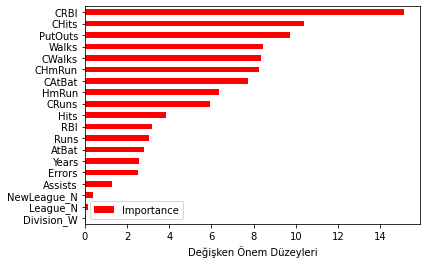

In [129]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri");

# eXtreme Gradient Boosting (XGBoost)

XGBoost,  GBMin hız ve tahmin performansını arttırmak üzere optimize edilmiş; ölçeklenebilir ve farklı platformlara entegre edilebilir halidir
<br><br>
* R, Python, Hadoop, Scala, Julia ile kullanılabilir
* Ölçeklenebilirdir
* Hızlıdır
* Tahmin başarısı yüksektir
* Birçok kaggle yarışmasında başarısı kanıtlanmıştır

In [7]:
hit = pd.read_csv("Ml3Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [10]:
# !pip install xgboost
# import xgboost as xgb
# from xbgoost impot XGBRegressor
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)
xgb_model = XGBRegressor().fit(X_train, y_train)

## Tahmin

In [11]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

355.46515176059927

## Model Tuning

In [12]:
?xgb_model

Type:        XGBRegressor
String form:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
           colsample_bynode <...> s_weight=1, subsample=1, tree_method='exact',
           validate_parameters=1, verbosity=None)
File:        c:\users\tolga\appdata\local\programs\python\python310\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost regression.


Parameters
----------

    n_estimators : int
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    learning_rate : Optional[float]
        Boosting learning rate (xgb's "eta")
    verbosity : Optional[int]
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : typing.Union[str, typing.Callable[[numpy.ndarray, numpy.ndarray], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]
        Specify the learning task and the 

In [13]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}

xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
      

In [14]:
xgb_cv.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500}

In [16]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.9, 
                         learning_rate = 0.01, 
                         max_depth = 5, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

360.4180975078934

# Light GBM

Light GBM, XGBoost'un eğitim süresi performansını arttırmaya yönelik geliştirilen bir diğer GBM türüdür
* Daha performanslıdır
* Level-wise büyüme stratejisi yerine Leaf-wise büyüme stratejisini izler
* Breadth-first search (BFS) yerine depth-first search (DFS) yöntemlerini kullanır

In [17]:
hit = pd.read_csv("Ml3Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [19]:
# !pip install lightgbm
# from lightgbm import LGBMRegressor
#conda install -c conda-forge lightgbm
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

## Tahmin

In [20]:
y_pred = lgbm_model.predict(X_test, num_iteration = lgbm_model.best_iteration_)
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

## Model Tuning

In [21]:
?lgbm_model

Type:           LGBMRegressor
String form:    LGBMRegressor()
File:           c:\users\tolga\appdata\local\programs\python\python310\lib\site-packages\lightgbm\sklearn.py
Docstring:      LightGBM regressor.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : str, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'goss', Gradient-based One-Side Sampling.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/adapt learning rate
    in training using ``reset_parameter`` callback.
    Note, that this will ignore the ``learning_rate`` argument in training.
n_esti

In [22]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


In [23]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 20}

In [24]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 7, 
                           n_estimators = 40,
                          colsample_bytree = 0.6)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [25]:
y_pred = lgbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

372.7342551250238

# CatBoost (Category Boosting)

Kategorik değişkenler ile otomatik olarak mücadele edebilen, hızlı, başarılı bir diğer GBM türevidir
* Kategorik değişken desteği
* Hızlı ve ölçeklenebilir GPU desteği
* Daha başarılı tahminler
* Hızlı train ve hızlı tahmin
* Rusyanın ilk açık kaynak kodlu, başarılı bir ML çalışması

In [26]:
hit = pd.read_csv("Ml3Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [27]:
# !pip install catboost
# from catboost import CatBoostRegressor
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 153ms	remaining: 2m 33s
1:	learn: 431.3923642	total: 157ms	remaining: 1m 18s
2:	learn: 424.8820360	total: 159ms	remaining: 53s
3:	learn: 418.2514904	total: 162ms	remaining: 40.2s
4:	learn: 412.6394021	total: 164ms	remaining: 32.6s
5:	learn: 406.6247020	total: 165ms	remaining: 27.4s
6:	learn: 400.5321206	total: 167ms	remaining: 23.7s
7:	learn: 394.6683437	total: 169ms	remaining: 20.9s
8:	learn: 388.2496484	total: 170ms	remaining: 18.7s
9:	learn: 382.9448842	total: 172ms	remaining: 17s
10:	learn: 377.2600080	total: 173ms	remaining: 15.6s
11:	learn: 372.4829606	total: 174ms	remaining: 14.4s
12:	learn: 366.6823437	total: 176ms	remaining: 13.4s
13:	learn: 362.6076230	total: 177ms	remaining: 12.5s
14:	learn: 358.0107745	total: 179ms	remaining: 11.8s
15:	learn: 353.2802665	total: 180ms	remaining: 11.1s
16:	learn: 348.5646265	total: 182ms	remaining: 10.5s
17:	learn: 343.6407912	total: 184ms	remaining: 10s
18:	learn: 339.2363847	total: 

## Tahmin

In [28]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

351.194631344607

## Model Tuning

In [29]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
0:	learn: 422.4143448	total: 15.5ms	remaining: 15.5s
1:	learn: 404.1864276	total: 16.4ms	remaining: 8.2s
2:	learn: 386.3231718	total: 17.1ms	remaining: 5.7s
3:	learn: 370.5548032	total: 17.9ms	remaining: 4.47s
4:	learn: 354.9242038	total: 18.7ms	remaining: 3.72s
5:	learn: 342.3403984	total: 19.5ms	remaining: 3.23s
6:	learn: 328.2370070	total: 20.3ms	remaining: 2.88s
7:	learn: 317.5056526	total: 21.2ms	remaining: 2.63s
8:	learn: 306.6243511	total: 22ms	remaining: 2.42s
9:	learn: 297.3147023	total: 22.9ms	remaining: 2.26s
10:	learn: 288.3685892	total: 23.7ms	remaining: 2.13s
11:	learn: 281.0996220	total: 24.3ms	remaining: 2s
12:	learn: 273.2254898	total: 25.1ms	remaining: 1.9s
13:	learn: 266.9003385	total: 25.8ms	remaining: 1.82s
14:	learn: 261.9092500	total: 26.5ms	remaining: 1.74s
15:	learn: 256.2637350	total: 27.3ms	remaining: 1.68s
16:	learn: 250.3667935	total: 28.1ms	remaining: 1.62s
17:	learn: 244.8631098	total: 28.8ms	r

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000020D6AA34070>,
             n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6, 7, 8],
                         'iterations': [200, 500, 1000, 2000],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1]},
             verbose=2)

In [30]:
catb_cv_model.best_params_

{'depth': 5, 'iterations': 1000, 'learning_rate': 0.1}

In [31]:
catb_tuned = CatBoostRegressor(iterations = 200, 
                               learning_rate = 0.01, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

0:	learn: 442.4903140	total: 13.8ms	remaining: 2.74s
1:	learn: 440.4621805	total: 16.9ms	remaining: 1.67s
2:	learn: 438.5132091	total: 19.9ms	remaining: 1.31s
3:	learn: 436.2180377	total: 22.8ms	remaining: 1.12s
4:	learn: 434.0461579	total: 26.1ms	remaining: 1.02s
5:	learn: 431.8437770	total: 29ms	remaining: 936ms
6:	learn: 430.1594587	total: 31.8ms	remaining: 878ms
7:	learn: 428.0941830	total: 34.8ms	remaining: 834ms
8:	learn: 426.0998774	total: 38ms	remaining: 805ms
9:	learn: 424.0249067	total: 38.8ms	remaining: 738ms
10:	learn: 422.1921868	total: 41.7ms	remaining: 717ms
11:	learn: 420.2506764	total: 44.5ms	remaining: 697ms
12:	learn: 418.3116383	total: 47.3ms	remaining: 680ms
13:	learn: 416.2966847	total: 50.1ms	remaining: 665ms
14:	learn: 414.5776175	total: 52.9ms	remaining: 653ms
15:	learn: 412.8009394	total: 55.9ms	remaining: 643ms
16:	learn: 410.9774146	total: 59.1ms	remaining: 636ms
17:	learn: 409.1047417	total: 61.9ms	remaining: 626ms
18:	learn: 407.6243957	total: 64.6ms	remai

In [32]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

369.6970696250705